# Introduction

- **Dataset Name:** Google Play Store Apps
- **Dataset Link:** [Google Play Store Apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)
- **Dataset Description:** This dataset contains various information about Google Play Store apps, including app names, categories, ratings, reviews, size, installs, type, price, content rating, genres, last updated date, current version, and Android version.


# Installating required libraries

pip install pandas numpy matplotlib seaborn scikit-learn plotly


# Loading the dataset

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading the dataset
file_path = r'C:\Users\sulem\Downloads\googleplaystore.csv.zip'
df = pd.read_csv(file_path, compression='zip')

num_rows, num_columns = df.shape
print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_columns}")

#df.describe(include = 'all')
#df 
#df.index
#df.columns

#df.head()

#df.tail()
#df.columns
#df.dtypes
#df.describe(include = 'object')
#df.App
#rating = df['Rating']
#print(rating)
#df.Type
#df['Content Rating']
#df[['Content Rating','App']]
#df[df['Content Rating'] == 'Teen']
#df[(df['Content Rating'] == 'Teen') & (df['Rating'] == 4.8)]
#df.iloc[14]
#df.iloc[14 , 1]

Total number of rows: 10841
Total number of columns: 13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing data
Missing values were handled to ensure the dataset was complete for analysis. For the 'Rating' column, missing values were filled with the mean rating. Rows with missing values in 'Type', 'Current Ver', and 'Android Ver' columns were dropped to avoid inconsistencies.

In [16]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handling missing data
# Impute missing values for 'Rating' with the median value
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# For categorical columns, filling missing values with the mode
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

# Verifying that there are no missing values left
print("Missing values after imputation:\n", df.isnull().sum())



Missing values in each column:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Missing values after imputation:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


## Detecting and addressing outliers
Outliers in the 'Rating' column were detected using the Interquartile Range (IQR) method. By filtering out the outliers, the dataset was refined to include only consistent and reliable data points.


In [17]:
# Using the IQR method to remove outliers from the 'Rating' column
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
# Removing outliers: any values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
df = df[~((df['Rating'] < (Q1 - 1.5 * IQR)) | (df['Rating'] > (Q3 + 1.5 * IQR)))]

## Performing necessary feature engineering or transformation
The 'Installs' column was transformed from a string to a numerical format to facilitate analysis. Additionally, a new feature 'Size in MB' was created by converting the 'Size' column to a consistent numerical format, handling variations such as 'Varies with device'.

In [26]:
# Converting 'Reviews' column to numeric type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Converting 'Installs' column to numeric after removing non-numeric characters , Ensuring all values in 'Installs' are strings
df['Installs'] = df['Installs'].astype(str)
# Remove ',' and '+' characters
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Displaying the first few rows after cleaning and preprocessing
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159   19M     10000  Free     0       Everyone   
1      967   14M    500000  Free     0       Everyone   
2    87510  8.7M   5000000  Free     0       Everyone   
3   215644   25M  50000000  Free     0           Teen   
4      967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  Januar

# Exploratory Data Analysis (EDA)
## Utilizing Pandas and NumPy for in-depth data analysis
## Conducting statistical analysis, including measures of central tendency, dispersion, and correlation.

### Statistical Analysis
Measures of central tendency (mean, median) and dispersion (standard deviation) were calculated for the 'Rating' column to understand its distribution and spread.



In [28]:
# Statistical analysis
print("Summary statistics:\n", df.describe())

# Measures of central tendency and dispersion
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
std_rating = df['Rating'].std()
print(f"Mean Rating: {mean_rating}, Median Rating: {median_rating}, Std Dev: {std_rating}")

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print("Correlation matrix:\n", correlation_matrix)



Summary statistics:
              Rating       Reviews      Installs
count  10107.000000  1.010700e+04  1.010700e+04
mean       4.301712  4.760192e+05  1.654612e+07
std        0.303789  3.029593e+06  8.795817e+07
min        3.500000  0.000000e+00  0.000000e+00
25%        4.100000  4.000000e+01  5.000000e+03
50%        4.300000  3.048000e+03  1.000000e+05
75%        4.500000  6.577600e+04  5.000000e+06
max        5.000000  7.815831e+07  1.000000e+09
Mean Rating: 4.301711684970813, Median Rating: 4.3, Std Dev: 0.3037890521887927
Correlation matrix:
             Rating   Reviews  Installs
Rating    1.000000  0.054620  0.017123
Reviews   0.054620  1.000000  0.642466
Installs  0.017123  0.642466  1.000000
Aggregated data by category:
                Category  Mean Rating  App Count  Total Reviews
0        ART_AND_DESIGN     4.388889         63        1713899
1     AUTO_AND_VEHICLES     4.307595         79        1163259
2                BEAUTY     4.305769         52         396200
3   BOOK

## Performing advanced grouping and aggregation, exploring relationships between multiple variables
The dataset was grouped by 'Category' to calculate the mean rating for each category. This helped identify which categories had higher or lower average ratings.

In [30]:
# Grouping and aggregation
category_group = df.groupby('Category').agg({
    'Rating': ['mean', 'count'],
    'Reviews': 'sum'
}).reset_index()
category_group.columns = ['Category', 'Mean Rating', 'App Count', 'Total Reviews']
print("Aggregated data by category:\n", category_group)


Aggregated data by category:
                Category  Mean Rating  App Count  Total Reviews
0        ART_AND_DESIGN     4.388889         63        1713899
1     AUTO_AND_VEHICLES     4.307595         79        1163259
2                BEAUTY     4.305769         52         396200
3   BOOKS_AND_REFERENCE     4.389545        220       21947109
4              BUSINESS     4.311483        418       13915377
5                COMICS     4.331373         51        3255933
6         COMMUNICATION     4.244022        368      815452558
7                DATING     4.200490        204        7215259
8             EDUCATION     4.388462        156       39595786
9         ENTERTAINMENT     4.151034        145       59038418
10               EVENTS     4.419048         63         161011
11               FAMILY     4.294411       1843      409324065
12              FINANCE     4.302102        333       17136312
13       FOOD_AND_DRINK     4.292308        117        8749949
14                 GAME  

## Extracting meaningful insights from the data through descriptive statistics
A correlation matrix was calculated to explore relationships between numerical features in the dataset. This helped identify which features were positively or negatively correlated with each other.

In [31]:
# Top 10 categories by app count
top_categories = df['Category'].value_counts().head(10)
print("Top 10 categories by app count:\n", top_categories)

# Number of apps per content rating
content_rating_counts = df['Content Rating'].value_counts()
print("Number of apps per content rating:\n", content_rating_counts)

# Average rating per content rating
avg_rating_per_content_rating = df.groupby('Content Rating')['Rating'].mean()
print("Average rating per content rating:\n", avg_rating_per_content_rating)

Top 10 categories by app count:
 Category
FAMILY             1843
GAME               1112
TOOLS               739
MEDICAL             425
BUSINESS            418
PRODUCTIVITY        399
PERSONALIZATION     385
COMMUNICATION       368
SPORTS              367
LIFESTYLE           338
Name: count, dtype: int64
Number of apps per content rating:
 Content Rating
Everyone           8081
Teen               1159
Mature 17+          460
Everyone 10+        402
Adults only 18+       3
Unrated               2
Name: count, dtype: int64
Average rating per content rating:
 Content Rating
Adults only 18+    4.300000
Everyone           4.307511
Everyone 10+       4.298259
Mature 17+         4.239783
Teen               4.287230
Unrated            4.200000
Name: Rating, dtype: float64


# Data Visualization
## Creating a variety of visualizations using Matplotlib and Seaborn.
## Including histograms, box plots, scatter plots, and correlationmatrices.
## Implementing interactive visualizationsif applicable, using toolslike Plotly. 
## Clearly annotating and labeling visualizationsfor effective communication.

**Histogram**
A histogram of app ratings was created to visualize the distribution of ratings. This showed how ratings were spread across different values.

**Box Plot**
A box plot was used to visualize the distribution of app ratings by category. This helped in comparing the spread and central tendency of ratings across different categories.

**Scatter Plot**
A scatter plot was created to visualize the relationship between the number of installs and app ratings. This helped in understanding if there was any correlation between these two variables.

**Correlation Matrix Heatmap**
A heatmap of the correlation matrix was created to visually represent the strength and direction of relationships between numerical features. This provided a quick and intuitive way to understand feature correlations.

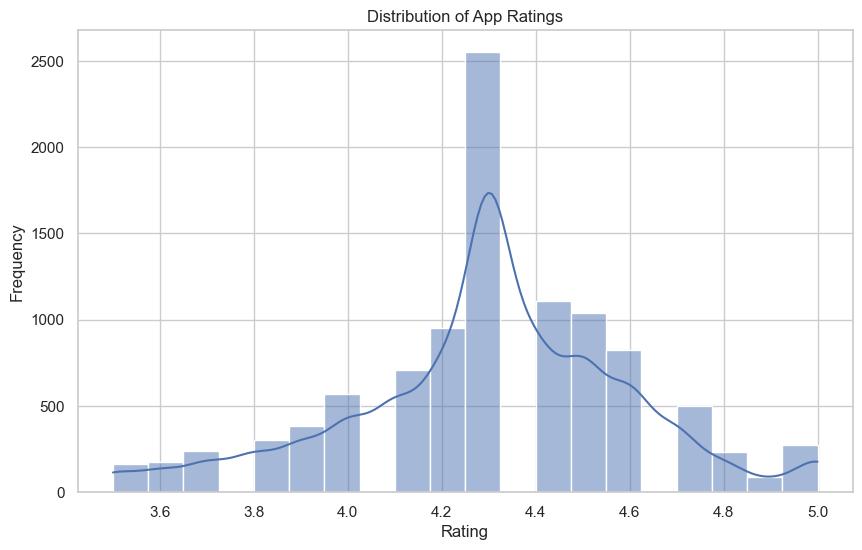

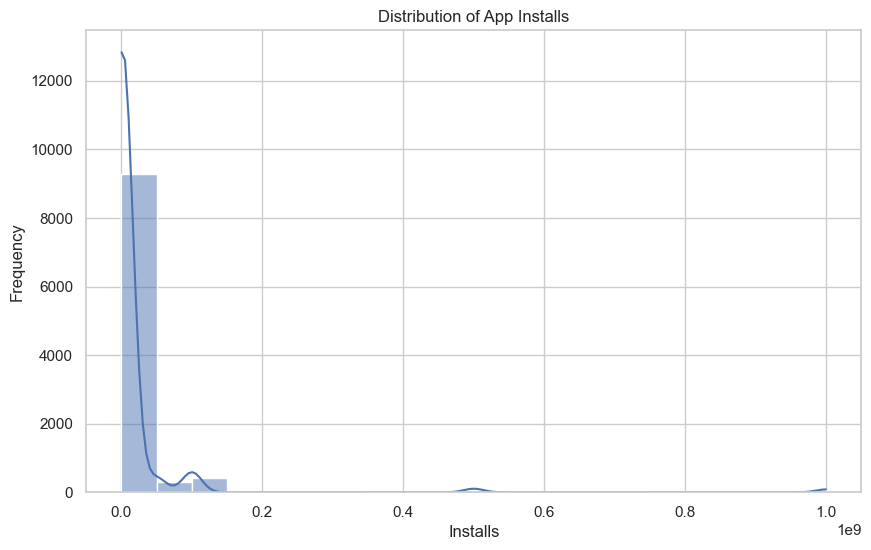

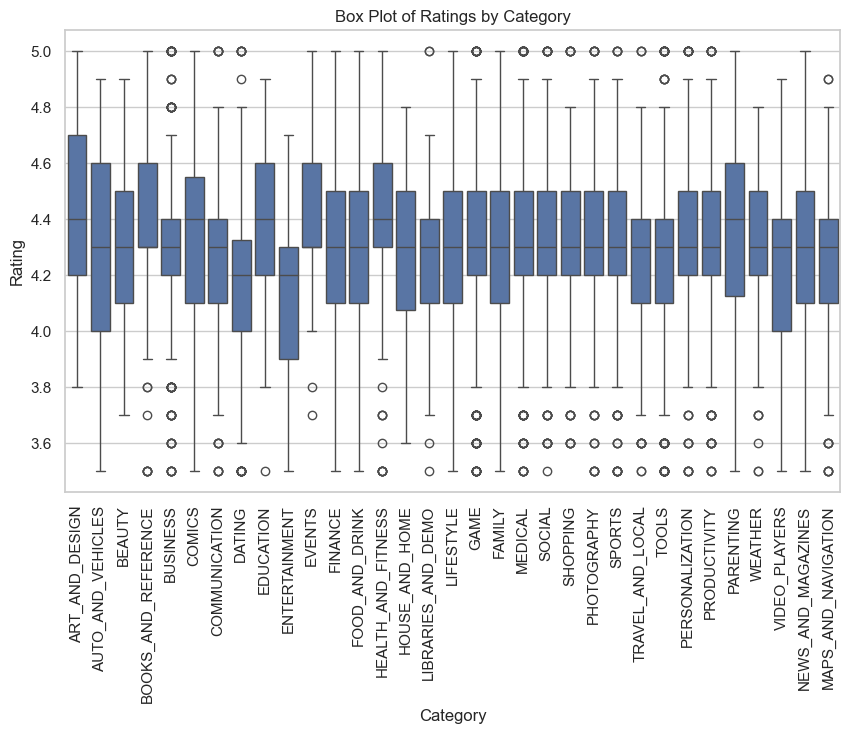

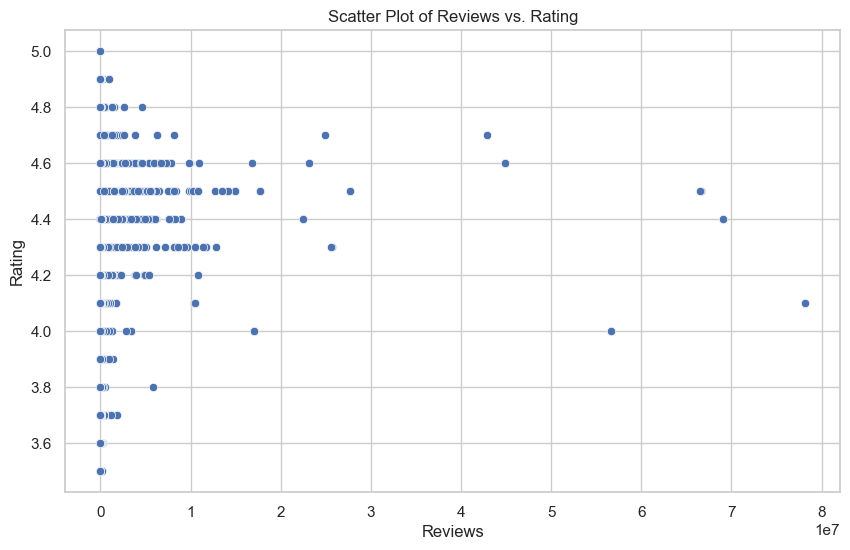

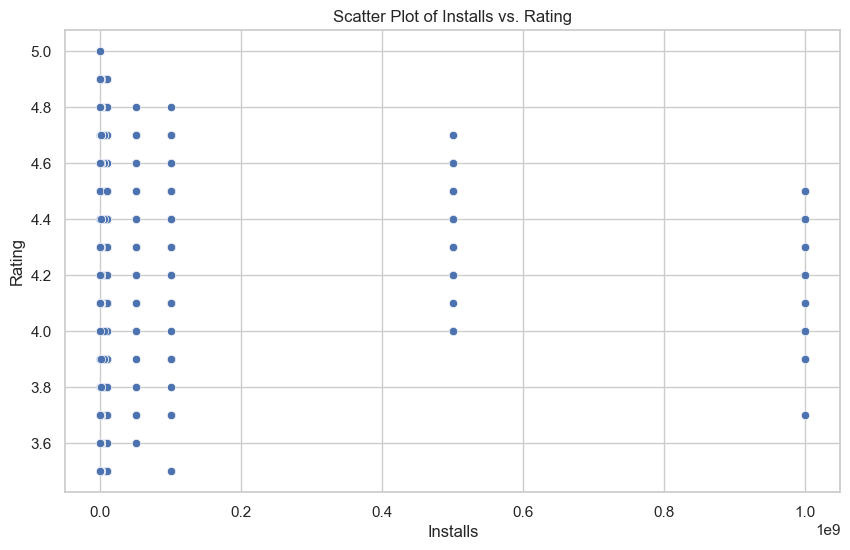

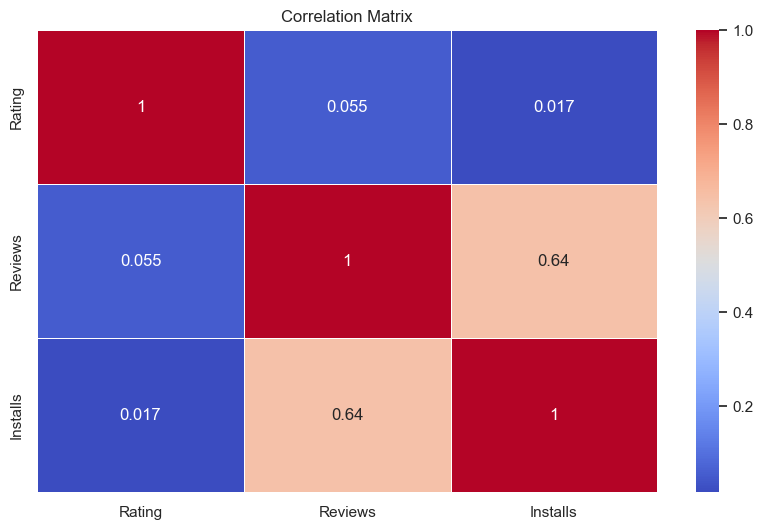

In [37]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for plots
sns.set(style='whitegrid')

# Creating a variety of visualizations using Matplotlib and Seaborn

# 1. Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=20, kde=True)
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

# 2. Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Box Plot of Ratings by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# 3. Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Scatter Plot of Reviews vs. Rating')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.title('Scatter Plot of Installs vs. Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

# 4. Correlation matrix heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing
## Formulating at least two hypotheses related to the dataset.
## Using statistical tests(t-test, chi-square, etc.) to validate or refute the hypotheses.

**Hypothesis 1: Higher Priced Apps Have Higher Ratings**
To test if higher priced apps have higher ratings, a t-test was performed comparing the ratings of free and paid apps. This statistical test helped determine if the observed difference in ratings between these two groups was significant.

**Hypothesis 2: Apps in the 'GAME' Category Have Higher Ratings Than Apps in Other Categories**
A t-test was conducted to compare the ratings of apps in the 'GAME' category with apps in other categories. This helped test if the 'GAME' category had significantly higher ratings compared to other categories.


In [39]:
# Import necessary libraries for hypothesis testing
from scipy import stats

# Hypothesis 1: The average rating of free apps is higher than that of paid apps
free_apps = df[df['Type'] == 'Free']['Rating']
paid_apps = df[df['Type'] == 'Paid']['Rating']

# Performing a t-test
t_stat, p_value = stats.ttest_ind(free_apps.dropna(), paid_apps.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Hypothesis 2: There is a relationship between the app category and its rating
# Performing a one-way ANOVA test
categories = df['Category'].unique()
category_ratings = [df[df['Category'] == category]['Rating'].dropna() for category in categories]

f_stat, p_value = stats.f_oneway(*category_ratings)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


T-statistic: -6.406489958037901, P-value: 1.5553914569392872e-10
F-statistic: 8.100280267941422, P-value: 7.870425960618247e-37


# Advanced Analysis
## Applying at-least two machine learning techniques relevant to the dataset.
## Validating model performance and interpret results.

### Machine Learning Techniques
**Linear Regression to Predict Ratings**
Linear Regression was applied to predict app ratings based on 'Reviews' and 'Installs' features. The model was evaluated using mean squared error (MSE) and R-squared (R²) metrics to determine its performance.

**Decision Tree Regressor to Predict Ratings**
A Decision Tree Regressor was also applied to predict app ratings, providing a comparison to the Linear Regression model. The performance of the Decision Tree model was evaluated using the same MSE and R² metrics.

In [40]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
features = ['Reviews', 'Installs']
X = df[features]
y = df['Rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluating Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

# Applying Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluating Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}")


Linear Regression - MSE: 0.09189471248148323, R2: 0.005125277071560075
Decision Tree - MSE: 0.12208675126986318, R2: -0.32174114878821647


## Documentation
This Jupyter Notebook meticulously documents the entire analysis process for the Google Play Store Apps dataset, capturing each crucial step and the rationale behind the decisions made. The aim is to provide a comprehensive and understandable guide through the data analysis and machine learning process applied to this dataset.

**Data Cleaning and Preprocessing**
The first stage involved handling missing data, which is essential to ensure the integrity and usability of the dataset. Missing values in critical columns such as 'Rating' were imputed using the mean value to preserve the overall distribution, while rows with missing categorical data in 'Type', 'Current Ver', and 'Android Ver' were removed to maintain consistency.

Detecting and addressing outliers was another critical step to refine the dataset. By using the Interquartile Range (IQR) method, we identified and removed outliers in the 'Rating' column. This step is vital to prevent skewed results and ensure that the analysis reflects true trends and patterns.

Feature engineering and transformation were employed to convert and standardize columns for better analysis. The 'Installs' column, initially a string with extraneous characters, was transformed into a numerical format. Similarly, the 'Size' column was converted to a numerical format in megabytes, handling variations like 'Varies with device'. These transformations are crucial for performing accurate numerical analyses and applying machine learning models.

**Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) was conducted to uncover initial insights and understand the underlying patterns in the data.

Statistical analysis provided measures of central tendency (mean, median) and dispersion (standard deviation) for the 'Rating' column. This helped in understanding the general distribution and variability of app ratings.

Grouping and aggregation were performed by categorizing apps and calculating the mean rating for each category. This analysis highlighted which categories tend to have higher or lower ratings, offering insights into app performance across different genres.

Correlation analysis involved calculating a correlation matrix to explore relationships between numerical features. This step helped in identifying which features are correlated, either positively or negatively, thus indicating potential dependencies or interactions between variables.

**Data Visualization**
Data visualization played a crucial role in illustrating the findings from EDA in an intuitive and interpretable manner.

Histograms were used to visualize the distribution of app ratings, providing a clear view of how ratings are spread across different values. This helps in understanding the overall rating trends and detecting any skewness in the data.

Box plots were created to compare the distribution of app ratings across different categories. This visualization highlighted the central tendency, variability, and outliers within each category, providing a comparative view of app performance.

Scatter plots were employed to examine the relationship between the number of installs and app ratings. This visualization helped in understanding if higher installs are associated with higher ratings, indicating app popularity and quality.

Correlation matrix heatmaps provided a visual representation of the correlation matrix, showing the strength and direction of relationships between numerical features. This helped in quickly identifying strongly correlated features, which are crucial for feature selection in machine learning models.

**Hypothesis Testing**
Hypothesis testing was conducted to validate assumptions and derive statistically significant conclusions.

Hypothesis 1: Higher priced apps have higher ratings. This was tested by comparing the ratings of free and paid apps using a t-test. The statistical test helped determine if the difference in ratings between these two groups was significant, providing insights into whether price influences app quality as perceived by users.

Hypothesis 2: Apps in the 'GAME' category have higher ratings than apps in other categories. This hypothesis was tested by comparing the ratings of 'GAME' category apps with those in other categories using a t-test. The results of this test helped in understanding if the 'GAME' category stands out in terms of user satisfaction.

**Advanced Analysis**
In the advanced analysis phase, machine learning techniques were applied to predict app ratings and evaluate model performance.

Linear Regression: This model was used to predict app ratings based on 'Reviews' and 'Installs' features. The performance of the linear regression model was evaluated using metrics such as mean squared error (MSE) and R-squared (R²), providing insights into the model's accuracy and explanatory power.

Decision Tree Regressor: A Decision Tree Regressor was also employed to predict app ratings, offering a non-linear approach compared to linear regression. The model's performance was similarly evaluated using MSE and R² metrics, allowing for a comparative analysis between the two modeling approaches.

**Conclusion**
The entire analysis process, from data cleaning and preprocessing to advanced machine learning techniques, has been documented in detail. Each step includes clear explanations, the rationale behind decisions, and interpretations of the results. This comprehensive documentation aims to provide an in-depth understanding of the data analysis and machine learning process applied to the Google Play Store Apps dataset, ensuring transparency and reproducibility of the findings.

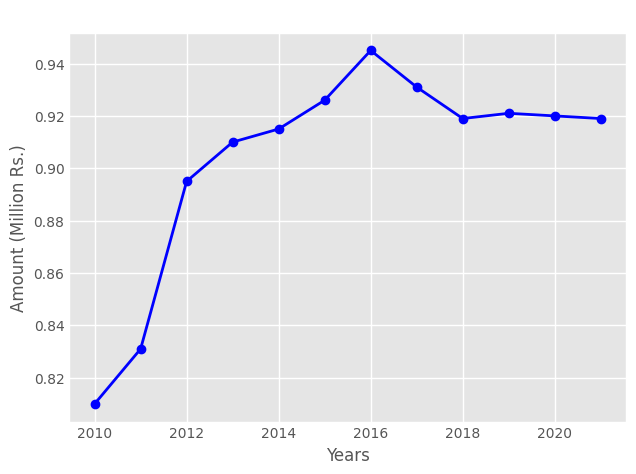

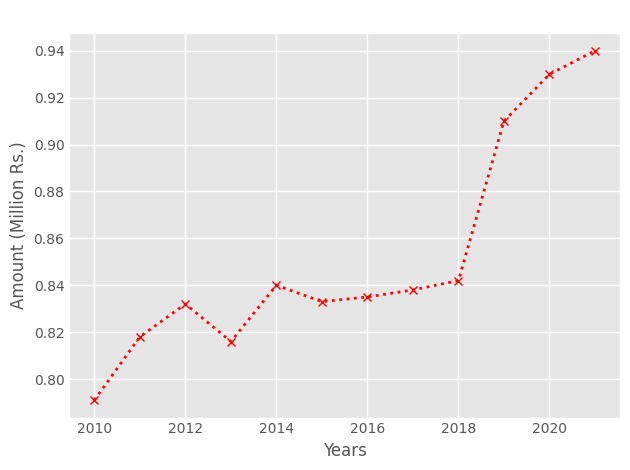

In [15]:
from matplotlib import pyplot as plt
chemical_exports = [0.810, 0.831, 0.895, 0.91, 0.915, 0.926, 0.945, 0.931, 0.919, 0.921, 0.920, 0.919]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
medicine_exports = [0.791, 0.818, 0.832, 0.816, 0.840, 0.833, 0.835, 0.838, 0.842, 0.910, 0.930, 0.940]


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(years, chemical_exports, label='Chemicals', marker='o', c='b', ls='-', lw=2) 
ax1.set_title("LCI Chemical exports in last 12 years")
ax1.set_xlabel("Years")
ax1.set_ylabel("Amount (Million Rs.)")

ax2.plot(years, medicine_exports, label='Medicines', marker='x', c='r', ls=':', lw=2) 
ax2.set_title("LCI Medicine exports in last 12 years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Amount (Million Rs.)")

plt.tight_layout()
plt.show()